<a href="https://colab.research.google.com/github/neverlast121/AutoEncoder_In_Pytorch/blob/main/Autoencoder_MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
mnist_data = datasets.MNIST(
    root = 'data',
    download = True,
    train = True,
    transform = ToTensor(),
)

100%|██████████| 9912422/9912422 [00:00<00:00, 134242511.43it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37538175.96it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29545621.69it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11803301.59it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data = DataLoader(
    dataset = mnist_data,
    batch_size = 64,
    shuffle = True
)

In [ ]:
data_iter = iter(train_data)
images, labels = next(data_iter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3)
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride = 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride = 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7),

    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride = 2, padding = 1, output_padding = 1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride = 2, padding = 1, output_padding = 1),
        nn.Sigmoid()
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = Autoencoder()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-5)

In [ ]:
nums_epoch = 10
outputs = []
for epoch in range(nums_epoch):
  for(img, _) in train_data:
    # img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = loss_fn(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')
  outputs.append((epoch, img, recon))
  print()


Epoch: 1, Loss: 0.0084

Epoch: 2, Loss: 0.0054

Epoch: 3, Loss: 0.0041

Epoch: 4, Loss: 0.0033

Epoch: 5, Loss: 0.0031

Epoch: 6, Loss: 0.0036

Epoch: 7, Loss: 0.0028

Epoch: 8, Loss: 0.0025

Epoch: 9, Loss: 0.0026

Epoch: 10, Loss: 0.0025



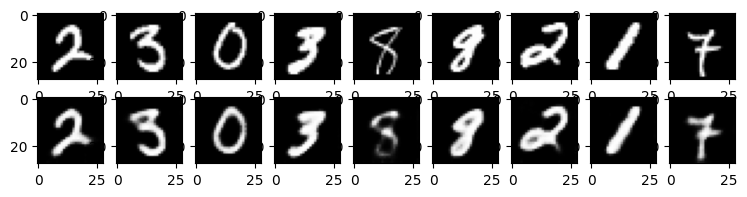

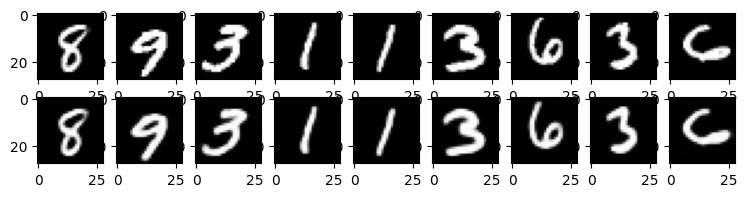

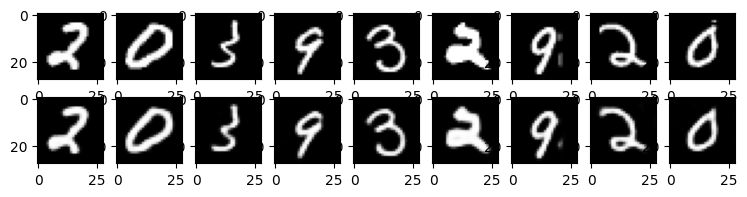

In [ ]:
for k in range(0, nums_epoch, 4):
  plt.figure(figsize = (9, 2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    # item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i , item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1)
    # item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])